In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    epochs=50, 
                    batch_size=64, 
                    validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7430 - loss: 0.7507 - val_accuracy: 0.8408 - val_loss: 0.4405
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8382 - loss: 0.4503 - val_accuracy: 0.8513 - val_loss: 0.4231
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8571 - loss: 0.4021 - val_accuracy: 0.8607 - val_loss: 0.3872
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8615 - loss: 0.3891 - val_accuracy: 0.8673 - val_loss: 0.3681
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8670 - loss: 0.3739 - val_accuracy: 0.8617 - val_loss: 0.3918
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8729 - loss: 0.3610 - val_accuracy: 0.8687 - val_loss: 0.3617
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8751 - loss: 0.3472 - val_accuracy: 0.8643 - val_loss: 0.3741
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8789 - loss: 0.3339 - val_acc

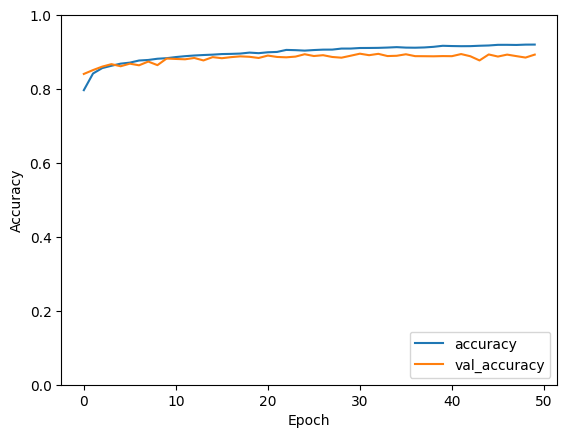

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()